### `Author: Firas Ali Obeid`

### [Personal Flask WebApp](https://firobeid.pythonanywhere.com/)


# HTML & PDF Web Scrapper
* Scrapes HTML Articles
* Scrapes Online PDFs
* Scrapes HTML hosting many PDFs

### Results: 
NLP of concatenated articles in one big corpus to get:
- Most frequent tokens (key words)
- Most Frequent Ngrams
- Name Entity Recognition of concatenated texts

### Package Installlations Requirements:

`pip install nltk  - > Natural Language toolkit library`

`pip install re - >  Regular expression package`

`pip install PyPDF2 - > Read and parse your content pdf`

`pip install requests - > request for get the pdf`

`pip install bs4 - > for parse the html and find all url hrf with ".pdf" final`

`pip install -U pyopenssl  - > provide a full support of OpenSSL lib`

`pip install splinter - > loads webpages in the browser`

`pip install lxml - > tree builder with the xml features`

`pip install webdriver_manager - >automates the browser setup in the Selenium code`

`pip install spacy - >  build information extraction or natural language understanding systems`

`pip install matplotlib - >  visualization library`

`pip install wordcloud - >  visualize key word frequency`

`python -m spacy download en_core_web_sm - > spaCy library language model`

`pip install xlsxwriter - > write to excel file results`


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import nltk 
import sys
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from bs4 import BeautifulSoup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import json
from PyPDF2 import PdfFileReader
import io
import warnings
import spacy
from spacy import displacy
#!python -m spacy download en_core_web_sm
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\feras.FIROMEGAPC\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


### Links Pass In:

* Fill `entity` with the name that the results excel file will be saved in
* Fill `PDFs` with the links od PDF files online
* Fill `html_pages` with the links of the html articles
* Fill `multiple_PDFs` with the links that have multiple PDFs on there site
* Leave `all_links`empty

Below is a few examples:

In [23]:
all_links = []
entity = "metaverse"
multiple_PDFs = []
PDFs = ["https://www.bis.org/publ/bppdf/bispap123_m.pdf",
       "https://www.bis.org/publ/bppdf/bispap123.pdf"]
multiple_htmls = []
html_pages = ["https://www.bis.org/review/r220420a.htm",
             "https://www.bis.org/speeches/sp220118.htm",
             "https://www.bis.org/speeches/sp210910.htm"]

## Page with many PDF links

In [24]:
if len(multiple_PDFs) > 0:
    i = 0
    while i < len(multiple_PDFs):    
        url=requests.get(multiple_PDFs[i])
        soup = BeautifulSoup(url.content,"lxml")
        #loop over each pdf found on the same URL
        for a in soup.find_all('a', href=True):
            pages = []
            mystr= a['href']
            if(mystr[-4:]=='.pdf'):
                print ("url with pdf final:", a['href'])
                urlpdf = a['href']
                response = requests.get(urlpdf)
                with io.BytesIO(response.content) as f:
                    pdf = PdfFileReader(f)
                    information = pdf.getDocumentInfo()
                    number_of_pages = pdf.getNumPages()
    #                 txt = f"""
    #                 Author: {information.author}
    #                 Creator: {information.creator}
    #                 Producer: {information.producer}
    #                 Subject: {information.subject}
    #                 Title: {information.title}
    #                 Number of pages: {number_of_pages}
    #                 """
                    # Here the metadata of your pdf
    #                 print(txt)
                    # numpage for the number page
                    numpage=number_of_pages
                    j=0
                    while j < numpage:
                        page = pdf.getPage(j)
                        page_content = page.extractText()
                        # print the content in the pages            
    #                     print(page_content)
                        pages.append(page_content)
                        j+=1

                all_links.append({"URL":multiple_PDFs[i],
                                  "Scraped": pages})

        i +=1
                          
        

## Scrape PDFs 

In [25]:
if len(PDFs) > 0:     
    j = 0
    while j < len(PDFs):
        response = requests.get(PDFs[j],verify=False)
        pages = []
        try:
            with io.BytesIO(response.content) as f:
                pdf = PdfFileReader(f)
                if pdf.isEncrypted:
                    pdf.decrypt("")
                information = pdf.getDocumentInfo()
                number_of_pages = pdf.getNumPages()
                txt = f"""
                Author: {information.author}
                Creator: {information.creator}
                Producer: {information.producer}
                Subject: {information.subject}
                Title: {information.title}
                Number of pages: {number_of_pages}
                """
                # Here the metadata of your pdf
                print(txt)
                print(type(number_of_pages))
                # numpage for the number page
                numpage=number_of_pages
                i=0
                while i < numpage:
                    page = pdf.getPage(i)
                    page_content = page.extractText()
                    # print the content in the pages            
    #                 print(page_content)
                    pages.append(page_content)
                    i+=1

                all_links.append({"URL":PDFs[j],
                                  "Scraped": pages})

        except:
            pass
        j+=1



                Author: Joonsuk Bae
                Creator: Acrobat PDFMaker 22 for Word
                Producer: Adobe PDF Library 22.1.117
                Subject: BP DGM 2022, April 2022
                Title: The Bank of Korea’s CBDC research: current status and key considerations
                Number of pages: 9
                
<class 'int'>

                Author: BIS
                Creator: Adobe Acrobat Standard DC (32-bit) 22.1.20085
                Producer: Adobe Acrobat Standard DC (32-bit) 22.1.20085
                Subject: BIS Papers No 123, DGM 2022, April 2022
                Title: CBDCs in emerging market economies
                Number of pages: 214
                
<class 'int'>


## Scrape Website Directly

In [27]:
if len(html_pages) > 0:
    i = 0
    while i < len(html_pages):

        try:
            browser.visit(html_pages[i])
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')

            article = [i.text for i in soup.find_all('p')  if i.text != ""]
        except:
            xml = requests.get(html_pages[i]).content
            soup = BeautifulSoup(xml, 'lxml')
            article = [i.text for i in soup.find_all('p')  if i.text != ""]
        all_links.append({"URL":html_pages[i],
                          "Scraped": article})
#         print(html_pages[i])
#         print(article[:100])

        i+=1


In [30]:
all_links = pd.DataFrame(all_links)

In [31]:
all_links.Scraped = all_links.Scraped.apply(lambda x : " ".join(x))

## Natural Language Processing

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams

In [33]:
def tokenizer(text, nonfrequent = None):
    """Tokenizes text."""
    # Instantiate the lemmatizer
    wnl = WordNetLemmatizer() 
    # Create a list of stopwords
    stop = stopwords.words('english')
    # Expand the default stopwords list if necessary
    stop.append("u")
    stop.append("it'")
    stop.append("'s")
    stop.append("n't")
    stop.append('…')
    stop.append("\`")
    stop.append("\n")
    stop.append('``')
    stop.append('char')
    stop.append("''")
    stop = set(stop)
    # Substitute everything that is NOT a letter with empty string
    regex = re.compile(r"[^a-zA-Z\w\s]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    #remove digits:
    words = list(filter(lambda w: not w.isdigit(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    if nonfrequent == None:
        pass
    else:
        words = list(filter(lambda t: t.lower() not in nonfrequent, words))
        
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


### Get N-Grams
* Tokens (keywords) that are associated & correlated together across the parsed articles 
- Keep `N = 3` for 3 associated words, `N = 2` for 2 associated words. `N > 3` if you want to experiment with it

In [34]:
N = 3
grams = ngrams(tokenizer(all_links.Scraped.str.cat()), N)
Counter(grams).most_common(100)

[(('BIS', 'Innovation', 'Hub'), 10),
 (('b', 'ig', 'ech'), 7),
 (('central', 'bank', 'digital'), 6),
 (('bank', 'digital', 'currency'), 6),
 (('fast', 'payment', 'system'), 4),
 (('ha', 'v', 'e'), 4),
 (('role', 'central', 'bank'), 4),
 (('central', 'bank', 'could'), 4),
 (('BIS', 'Working', 'Papers'), 4),
 (('credit', 'card', 'use'), 3),
 (('distributed', 'ledger', 'technology'), 3),
 (('ledger', 'technology', 'DLT'), 3),
 (('Annual', 'Economic', 'Report'), 3),
 (('BIS', 'host', 'nine'), 3),
 (('host', 'nine', 'international'), 3),
 (('nine', 'international', 'organisation'), 3),
 (('international', 'organisation', 'engaged'), 3),
 (('organisation', 'engaged', 'standard'), 3),
 (('engaged', 'standard', 'setting'), 3),
 (('standard', 'setting', 'pursuit'), 3),
 (('setting', 'pursuit', 'financial'), 3),
 (('pursuit', 'financial', 'stability'), 3),
 (('financial', 'stability', 'Basel'), 3),
 (('stability', 'Basel', 'Process'), 3),
 (('Basel', 'Process', 'section'), 3),
 (('central', 'ban

* Count Token Frequenies:

In [35]:
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
all_tokens = tokenizer(all_links.Scraped.str.cat())
token_count(all_tokens, 10)

[('bank', 93),
 ('central', 63),
 ('CBDC', 62),
 ('system', 59),
 ('financial', 58),
 ('e', 55),
 ('payment', 51),
 ('service', 49),
 ('BIS', 41),
 ('digital', 41)]

### Visualize Workcloud

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

def wordcloud(text, title="", save = None):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    if save != None:
        plt.savefig('%s.jpeg'%title)
    plt.show()

* Choose a title for your wordcloud

In [39]:
title = "%s"%entity

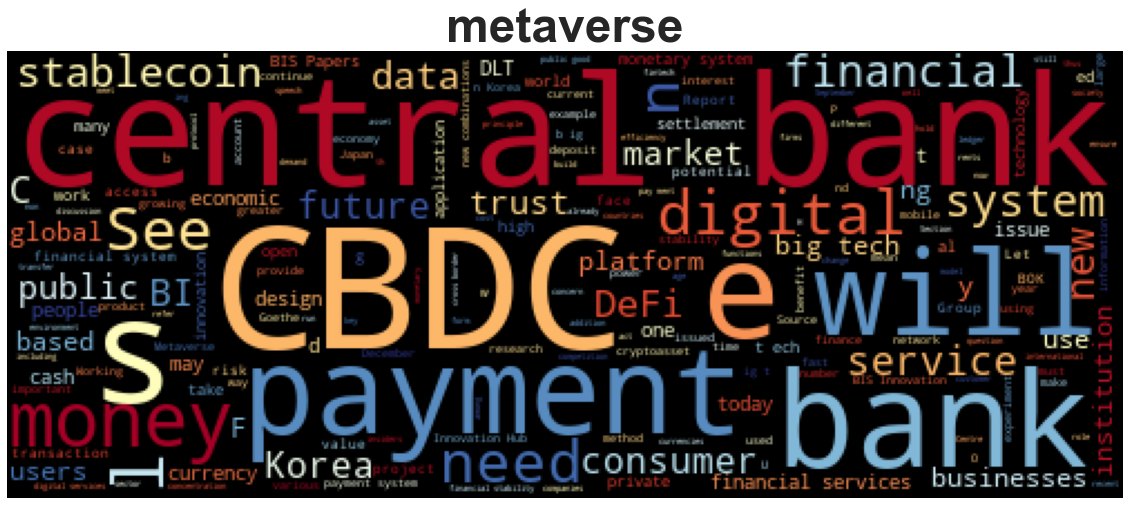

In [40]:
wordcloud(all_links.Scraped.str.cat(), title=title)

In [41]:
key_words = pd.DataFrame(Counter(all_tokens).most_common()[::-1], columns = ["Tokens", "Frequency"])

* Clean Key words to remove redundant tokens less then 75% quantile

In [42]:
display(key_words.describe())
remove =  list(key_words[ ~(key_words.Frequency < key_words.describe().iloc[6][0])]["Tokens"].values)
key_words = key_words[ ~(key_words.Frequency < key_words.describe().iloc[6][0])]
display(key_words.describe())

,Frequency
count,2554.000000
mean,2.526233
std,4.797618
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,93.000000


,Frequency
count,997.000000
mean,4.909729
std,7.047734
min,2.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,93.000000


* The redundant tokens that will be removed:

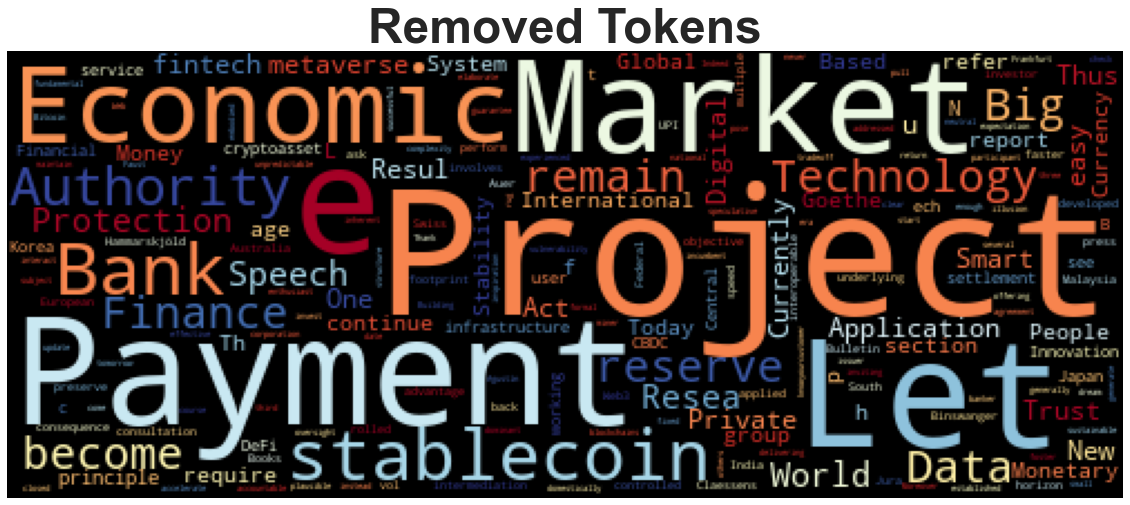

In [43]:
wordcloud(" ".join(remove), title="Removed Tokens")

* Preview Final WordCloud & Saveit

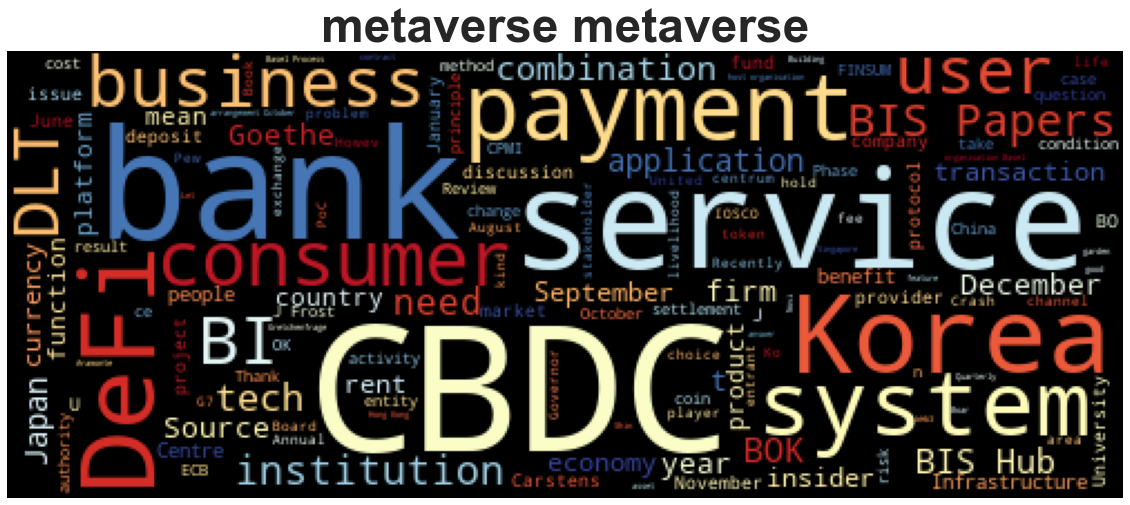

In [44]:
final_tokens = tokenizer(all_links.Scraped.str.cat(), nonfrequent = remove)
wordcloud(" ".join(final_tokens), title="%s %s"% (title, entity), save = "Yes")

* Choose the number of `top` for tokens number to save

In [45]:
top = 100

top_tokens = pd.DataFrame(token_count(final_tokens, top), columns = ["Top %d Tokens"%top, "Frequency"])
top_tokens.head()

,Top 100 Tokens,Frequency
0,CBDC,62
1,bank,56
2,service,45
3,BIS,41
4,Korea,28


In [46]:
grams = ngrams(tokenizer(all_links.Scraped.str.cat()), N)
grams = pd.DataFrame(Counter(grams).most_common(top), columns = ["Top %d Ngrams(%d)"%(top,N), "Frequency"])
grams

,Top 100 Ngrams(3),Frequency
0,"(BIS, Innovation, Hub)",10
1,"(b, ig, ech)",7
2,"(central, bank, digital)",6
3,"(bank, digital, currency)",6
4,"(fast, payment, system)",4
...,...,...
95,"(Financial, Market, Infrastructures)",2
96,"(Market, Infrastructures, stablecoin)",2
97,"(Infrastructures, stablecoin, arrangement)",2
98,"(Innovation, Hub, Hong)",2


### Name Entity Recognition Analysis
Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entities mentioned in the concatenated texts from the articles that where parsed.

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [49]:
try:
    doc = nlp(all_links.Scraped.str.cat())

    # Add a title to the document
    doc.user_data["title"] = "%s NER" % entity
except:
    doc = nlp(all_links.Scraped.str.cat()[:1000000])

    # Add a title to the document
    doc.user_data["title"] = "%s NER" % entity

In [50]:
displacy.render(doc, style='ent', jupyter=True)

* Save final NERs into tabular data

In [51]:
ners = pd.DataFrame(columns =["Text", "Label Annotations"])
for i,j in enumerate(doc.ents):
    ners.loc[i,:] = (j.text, j.label_)
    
ners = ners[~ners.Text.duplicated()]

## Final Deliverable to Excel

In [53]:
writer = pd.ExcelWriter('Keywords_%s.xlsx'%entity, engine='xlsxwriter')
grams.to_excel(writer, 'Ngrams',index=False)
top_tokens.to_excel(writer, 'tokens', index=False)
ners.to_excel(writer, 'NameEntityRecognition', index=False)
writer.save()